In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils

from utils import local_data
from utils import window
from utils import Scale

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df_series_vtec = pd.read_pickle(os.path.join(local_data, "df_series_tec_re.pkl.xz"), compression='xz')
df_series_s4 = pd.read_pickle(os.path.join(local_data, "df_series_s4_re.pkl.xz"), compression='xz')
df_station = pd.read_pickle(os.path.join(local_data, 'df_station_sort_re.pkl'))

In [3]:
df_station

identificationstation    height   latitude  longitude  \
city_name_correct                                                           
Belo Horizonte                        bhz   858.000 -19.868500 -47.869400   
Brasília                              bsa  1050.000 -15.764200 -47.869400   
Cachoeira Paulista                    cpa   580.000 -22.410000 -45.000000   
Campo Grande                           32       NaN -20.497000 -54.615000   
Cuiaba                                cub   278.000 -15.555200 -56.069800   
Dourados                              dou   756.120 -22.110000 -54.550000   
Fortaleza                              24       NaN  -3.742000 -38.539000   
Galeão                                 34       NaN -22.823000 -43.238000   
Guaratinguetá                          33       NaN -22.789000 -45.220000   
Ilhéus                                ios     0.000 -14.470000 -39.100000   
Inconfidentes                          25       NaN -22.318000 -46.329000   
Macaé                                  11       NaN -22.823000 -43.238000   
Natal                                 nta     0.000  -5.836162 -35.121000   
Palmas                                  3       NaN -10.200000 -48.312000   
Pirassununga                           30       NaN -21.989000 -47.334000   
Porto Alegre                            4       NaN -30.071000 -51.119000   
Presidente Prudente                     6       NaN -22.120000 -51.407000   
Salvador                               26       NaN -13.001000 -38.508000   
Santa Maria                           sta   110.100 -29.712591 -53.717206   
São José dos Campos                   sj2   593.440 -23.207000 -45.859000   
Tefé                                  tfe     0.057  -3.180000 -64.440000   

                    state                                      city  
city_name_correct                                                    
Belo Horizonte         mg                            belo horizonte  
Brasília               df                                  brasilia  
Cachoeira Paulista     sp                        cachoeira paulista  
Campo Grande           ms                             campos grande  
Cuiaba                 mt                                    cuiaba  
Dourados               ms                                  dourados  
Fortaleza              ce                                 fortaleza  
Galeão                 rj                                    galeão  
Guaratinguetá          sp                            guaratinguestá  
Ilhéus                 ba                                    ilheus  
Inconfidentes          mg                             inconfidentes  
Macaé                  rj                                     macaé  
Natal                  rn                                     natal  
Palmas                 ro                                    palmas  
Pirassununga           sp  academia das forças aérias, pirassununga  
Porto Alegre           rs                              porto alegre  
Presidente Prudente    sp                       presidente prudente  
Salvador               ba                                  salvador  
Santa Maria            rs                               santa maria  
São José dos Campos    sp                 são josé dos campos(inpe)  
Tefé                   am                                      tefe

In [4]:
# to vtec data
value_min_vtec = df_series_vtec.min().min()
value_max_vtec = df_series_vtec.max().max()

print('Valor mínimo de vtec:', value_min_vtec)
print('Valor máximo de vtec:', value_max_vtec)

scale_vtec = Scale(value_min_vtec, value_max_vtec)

# to s4 data
value_min_s4 = df_series_s4.min().min()
value_max_s4 = df_series_s4.max().max()

print('Valor mínimo de s4:', value_min_s4)
print('Valor máximo de s4:', value_max_s4)

scale_s4 = Scale(value_min_s4, value_max_s4)

Valor mínimo de vtec: -26.57855881389994
Valor máximo de vtec: 117.13048747398241
Valor mínimo de s4: 0.07968408467663693
Valor máximo de s4: 0.7119249756191673


In [5]:
for i in df_series_vtec.columns:
    df_series_vtec[i] = scale_vtec(df_series_vtec[i].values.ravel())
    
for i in df_series_s4.columns:
    df_series_s4[i] = scale_s4(df_series_s4[i].values.ravel())

In [6]:
df_series_vtec.head()

bhz       bsa       cpa        32       cub  \
2013-12-01 00:00:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00       NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00  0.611048  0.481535  0.540517  0.608755  0.441941   

                               dou        24        34        33       ios  \
2013-12-01 00:00:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00  0.58138  0.364695  0.492985  0.540182  0.329941   

                            ...          11       nta         3        30  \
2013-12-01 00:00:00+00:00   ...         NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00   ...         NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00   ...         NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00   ...         NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00   ...    0.492985  0.394084  0.276763  0.601917   

                                 4         6        26       sta       sj2  \
2013-12-01 00:00:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:10:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:20:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:30:00+00:00      NaN       NaN       NaN       NaN       NaN   
2013-12-01 00:40:00+00:00  0.44162  0.605102  0.353498  0.432676  0.538198   

                              tfe  
2013-12-01 00:00:00+00:00     NaN  
2013-12-01 00:10:00+00:00     NaN  
2013-12-01 00:20:00+00:00     NaN  
2013-12-01 00:30:00+00:00     NaN  
2013-12-01 00:40:00+00:00  0.3986  

[5 rows x 21 columns]

In [7]:
df_series_s4.head()

bhz       bsa       cpa  32       cub       dou  \
2013-12-01 00:00:00  0.777552  0.405217  0.668579 NaN  0.289407  0.431557   
2013-12-01 00:10:00  0.801537  0.413134  0.639160 NaN  0.283371  0.429157   
2013-12-01 00:20:00  0.805985  0.439793  0.616803 NaN  0.311481  0.440263   
2013-12-01 00:30:00  0.781881  0.458669  0.604081 NaN  0.356622  0.456270   
2013-12-01 00:40:00  0.727532  0.446478  0.594360 NaN  0.396074  0.447155   

                           24  34  33       ios ...         11       nta  \
2013-12-01 00:00:00  0.133389 NaN NaN  0.751428 ...   0.031789  0.436538   
2013-12-01 00:10:00  0.133390 NaN NaN  0.655416 ...   0.033415  0.401587   
2013-12-01 00:20:00  0.133390 NaN NaN  0.585450 ...   0.040747  0.360392   
2013-12-01 00:30:00  0.133390 NaN NaN  0.544922 ...   0.049867  0.322250   
2013-12-01 00:40:00  0.133391 NaN NaN  0.531013 ...   0.056345  0.295417   

                            3  30         4         6        26       sta  \
2013-12-01 00:00:00  0.132662 NaN  0.055156  0.088260  0.138926  0.217535   
2013-12-01 00:10:00  0.142204 NaN  0.045788  0.083625  0.138926  0.249428   
2013-12-01 00:20:00  0.152107 NaN  0.037054  0.078781  0.138926  0.253651   
2013-12-01 00:30:00  0.168718 NaN  0.029844  0.080520  0.138926  0.231914   
2013-12-01 00:40:00  0.192739 NaN  0.029556  0.094274  0.138926  0.184824   

                          sj2  tfe  
2013-12-01 00:00:00  0.415230  NaN  
2013-12-01 00:10:00  0.416673  NaN  
2013-12-01 00:20:00  0.415509  NaN  
2013-12-01 00:30:00  0.439860  NaN  
2013-12-01 00:40:00  0.470398  NaN  

[5 rows x 21 columns]

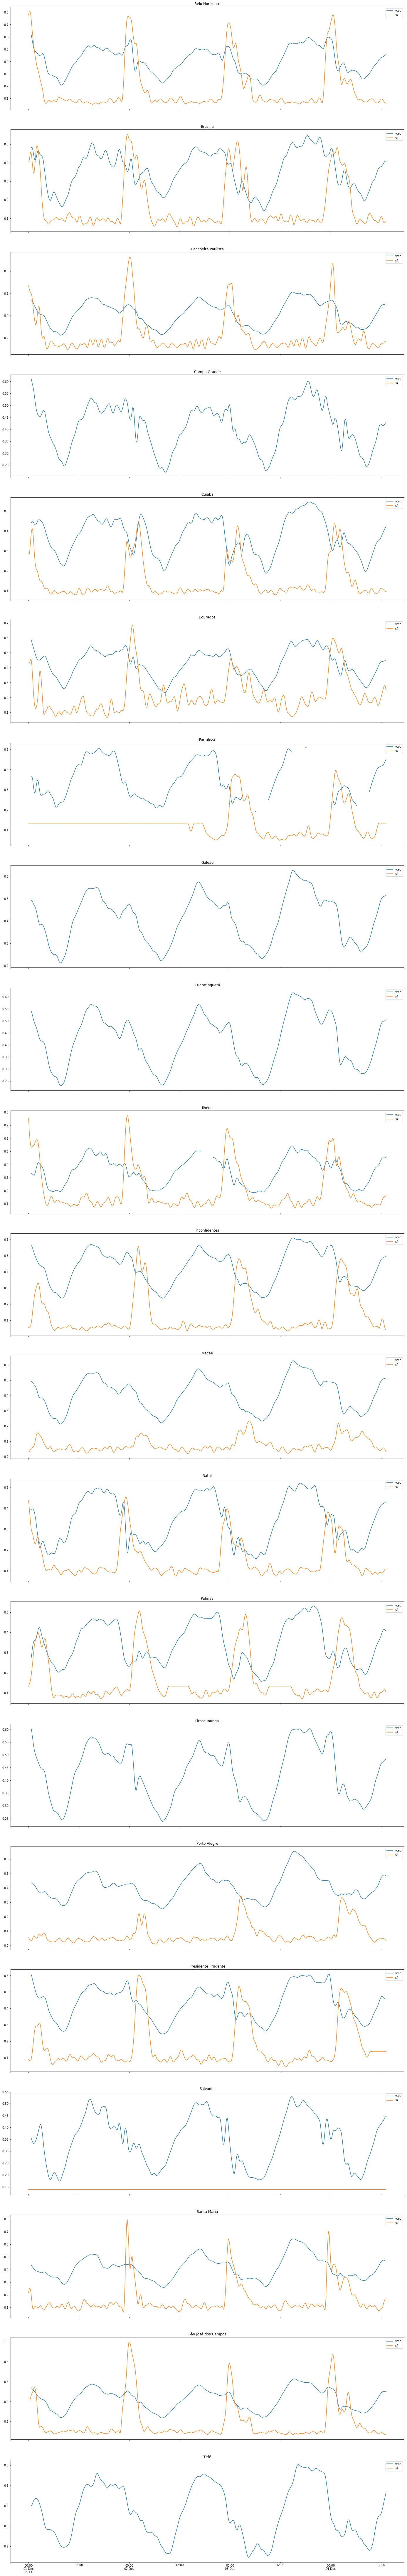

In [8]:
size = df_series_vtec.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_vtec.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:512].plot(figsize=(24, 160), ax=ax[idx], label='vtec')
    df_series_s4[i][0:512].plot(figsize=(24, 160), ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right")

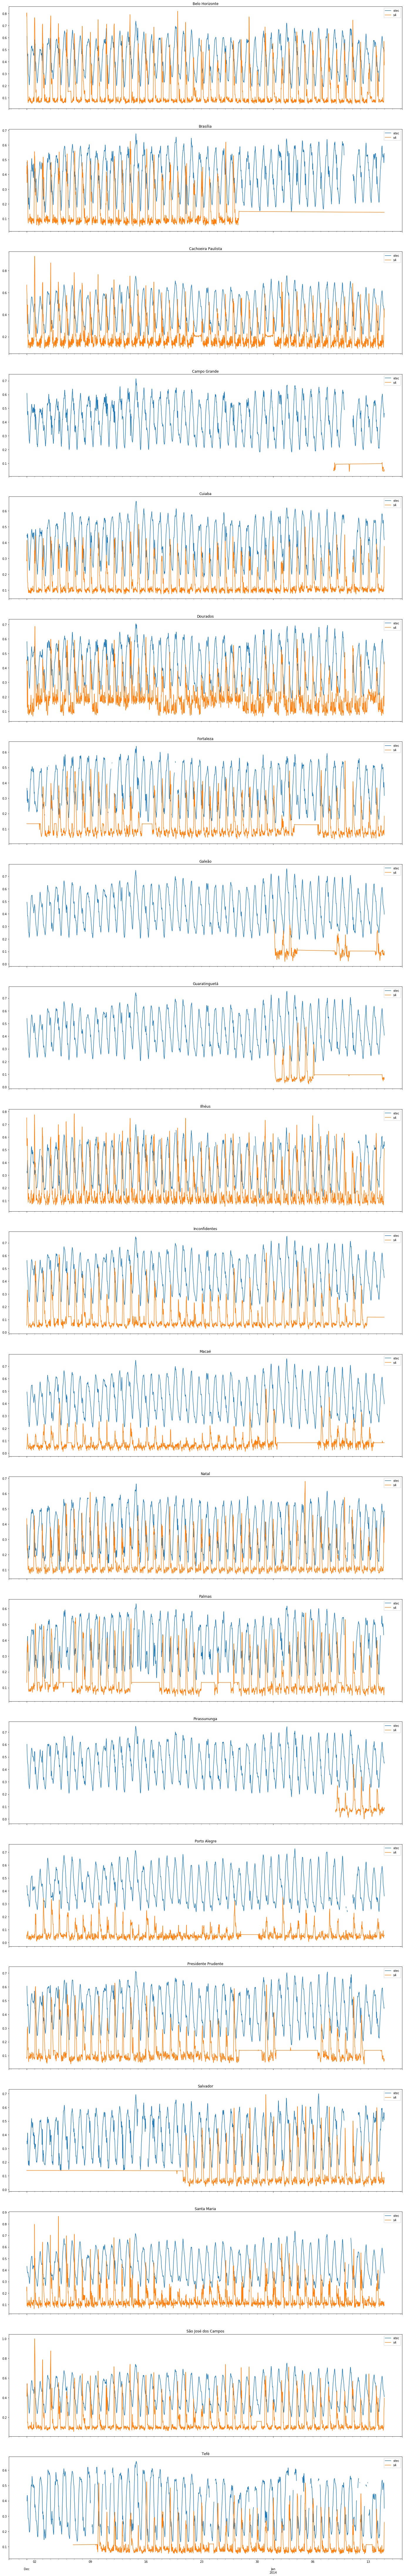

In [9]:
size = df_series_vtec.columns.size
fig, ax = plt.subplots(size, 1, sharex=True)
for idx, i in enumerate(df_series_vtec.columns):
    name = df_station.loc[df_station['identificationstation'] == i].index[0]
    df_series_vtec[i][0:6480].plot(figsize=(24, 160), ax=ax[idx], label='vtec')
    df_series_s4[i][0:6480].plot(figsize=(24, 160), ax=ax[idx], label='s4')
    ax[idx].set_title(name)
    ax[idx].legend(loc="upper right")